# Assignment - 1

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df0 = pd.read_csv('firmware.csv', delimiter = ',')

## Data Preprocessing

### Importing the dataset

In [ ]:
dataset = df0[['filename','class']]
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

### Encoding categorical data

In [ ]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)

In [ ]:
X_train.shape

(2146, 2683, 1)

In [ ]:
y_train.shape

(2146, 3)

In [ ]:
X_test.shape

(537, 2683)

In [ ]:
y_test.shape

(537, 3)

## Experiment 1 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))

### Adding the hidden layers

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=3, activation='linear'))

### Training the ANN

In [ ]:
from keras import backend as K
K.set_value(ann.optimizer.learning_rate, 0.001)

In [ ]:
ann.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = ann.fit(X_train, y_train, batch_size = 20, epochs = 10)

### Visualizing performance

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting results


In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred[0].reshape(len(y_pred[0]),1), y_test[0].reshape(len(y_test[0]),1)),1))
print(np.concatenate((y_pred[1].reshape(len(y_pred[1]),1), y_test[1].reshape(len(y_test[1]),1)),1))
print(np.concatenate((y_pred[2].reshape(len(y_pred[2]),1), y_test[2].reshape(len(y_test[2]),1)),1))

## Experiment 2 - Building the CNN Model

### Approach 1 - Building the CNN

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(32, 3, activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=3,activation='relu'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
68/68 [==============================] - 5s 61ms/step - loss: -0.9358 - accuracy: 0.6370
Epoch 2/10
68/68 [==============================] - 3s 38ms/step - loss: -3.4645 - accuracy: 0.9147
Epoch 3/10
68/68 [==============================] - 3s 38ms/step - loss: -3.5952 - accuracy: 0.9278
Epoch 4/10
68/68 [==============================] - 3s 38ms/step - loss: -3.6324 - accuracy: 0.9278
Epoch 5/10
68/68 [==============================] - 3s 38ms/step - loss: -3.6262 - accuracy: 0.9287
Epoch 6/10
68/68 [==============================] - 3s 38ms/step - loss: -3.6247 - accuracy: 0.9287
Epoch 7/10
68/68 [==============================] - 3s 39ms/step - loss: -3.6247 - accuracy: 0.9287
Epoch 8/10
68/68 [==============================] - 3s 41ms/step - loss: -3.6247 - accuracy: 0.9287
Epoch 9/10
68/68 [==============================] - 3s 39ms/step - loss: -3.6247 - accuracy: 0.9287
Epoch 10/10
68/68 [==============================] - 3s 39ms/step - loss: -3.6247 - accuracy: 0.9287

### Approach 2 - Building the CNN by introducing softmax activation function

In [ ]:
cnn1 = tf.keras.models.Sequential()
cnn1.add(tf.keras.layers.Conv1D(32, 3, activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(units=3,activation='softmax'))
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn1.fit(X_train,y_train,batch_size = 20,epochs = 10)

Epoch 1/10
108/108 [==============================] - 3s 27ms/step - loss: -0.1142 - accuracy: 0.3733
Epoch 2/10
108/108 [==============================] - 3s 27ms/step - loss: -3.8265 - accuracy: 0.9804
Epoch 3/10
108/108 [==============================] - 3s 27ms/step - loss: -14.5917 - accuracy: 0.9828
Epoch 4/10
108/108 [==============================] - 3s 26ms/step - loss: -34.7721 - accuracy: 0.9981
Epoch 5/10
108/108 [==============================] - 3s 26ms/step - loss: -64.2635 - accuracy: 0.9949
Epoch 6/10
108/108 [==============================] - 3s 27ms/step - loss: -102.8670 - accuracy: 1.0000
Epoch 7/10
108/108 [==============================] - 3s 27ms/step - loss: -149.9921 - accuracy: 1.0000
Epoch 8/10
108/108 [==============================] - 3s 26ms/step - loss: -205.5318 - accuracy: 1.0000
Epoch 9/10
108/108 [==============================] - 3s 25ms/step - loss: -268.7446 - accuracy: 1.0000
Epoch 10/10
108/108 [==============================] - 3s 26ms/step - l

### Approach 3 - Building the CNN by adjusting filter and kernel size

In [ ]:
cnn3 = tf.keras.models.Sequential()
cnn3.add(tf.keras.layers.Conv1D(3, 3, activation='relu'))
cnn3.add(tf.keras.layers.Flatten())
cnn3.add(tf.keras.layers.Dense(units=3,activation='softmax'))
cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn3.fit(X_train,y_train,epochs = 10)

Epoch 1/10
68/68 [==============================] - 2s 17ms/step - loss: 0.1583 - accuracy: 0.2423
Epoch 2/10
68/68 [==============================] - 1s 17ms/step - loss: -0.5152 - accuracy: 0.6193
Epoch 3/10
68/68 [==============================] - 1s 17ms/step - loss: -1.4033 - accuracy: 0.9380
Epoch 4/10
68/68 [==============================] - 1s 16ms/step - loss: -2.7514 - accuracy: 0.9124
Epoch 5/10
68/68 [==============================] - 1s 17ms/step - loss: -4.6308 - accuracy: 0.9781
Epoch 6/10
68/68 [==============================] - 1s 16ms/step - loss: -7.0095 - accuracy: 0.9972
Epoch 7/10
68/68 [==============================] - 1s 17ms/step - loss: -9.8852 - accuracy: 0.9991
Epoch 8/10
68/68 [==============================] - 1s 17ms/step - loss: -13.2833 - accuracy: 0.9995
Epoch 9/10
68/68 [==============================] - 1s 16ms/step - loss: -17.1848 - accuracy: 1.0000
Epoch 10/10
68/68 [==============================] - 1s 16ms/step - loss: -21.5365 - accuracy: 1.00

### Approach 4 - Building the CNN by keeping filter = 100 and kernel size = 4

In [ ]:
cnn4 = tf.keras.models.Sequential()
cnn4.add(tf.keras.layers.Conv1D(100, 4, activation='relu'))
cnn4.add(tf.keras.layers.Flatten())
cnn4.add(tf.keras.layers.Dense(units=3,activation='softmax'))
cnn4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn4.fit(X_train,y_train,epochs = 10)

Epoch 1/10
68/68 [==============================] - 9s 126ms/step - loss: -0.0019 - accuracy: 0.5913
Epoch 2/10
68/68 [==============================] - 7s 99ms/step - loss: -7.7793 - accuracy: 0.9343
Epoch 3/10
68/68 [==============================] - 7s 98ms/step - loss: -29.9232 - accuracy: 0.9790
Epoch 4/10
68/68 [==============================] - 7s 98ms/step - loss: -71.3465 - accuracy: 0.9739
Epoch 5/10
68/68 [==============================] - 7s 100ms/step - loss: -131.9832 - accuracy: 0.9958
Epoch 6/10
68/68 [==============================] - 7s 101ms/step - loss: -212.9570 - accuracy: 0.9977
Epoch 7/10
68/68 [==============================] - 7s 99ms/step - loss: -311.6064 - accuracy: 0.9995
Epoch 8/10
68/68 [==============================] - 7s 98ms/step - loss: -429.7917 - accuracy: 0.9986
Epoch 9/10
68/68 [==============================] - 7s 97ms/step - loss: -564.4125 - accuracy: 0.9963
Epoch 10/10
68/68 [==============================] - 7s 99ms/step - loss: -716.7828 -

### Visualizing performance

dict_keys(['loss', 'accuracy'])


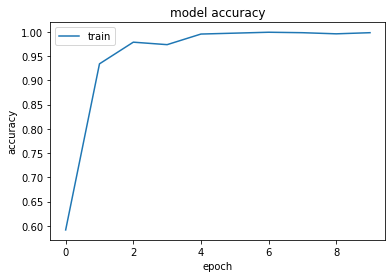

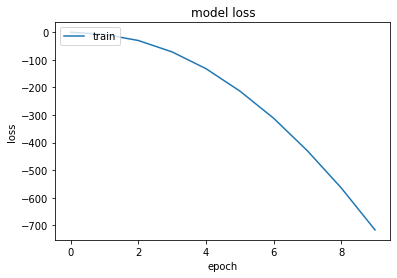

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting results

In [ ]:
y_pred = cnn4.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred[0].reshape(len(y_pred[0]),1), y_test[0].reshape(len(y_test[0]),1)),1))
print(np.concatenate((y_pred[1].reshape(len(y_pred[1]),1), y_test[1].reshape(len(y_test[1]),1)),1))
print(np.concatenate((y_pred[2].reshape(len(y_pred[2]),1), y_test[2].reshape(len(y_test[2]),1)),1))

[[ 0.         -1.50151439]
 [ 1.          5.3696679 ]
 [ 0.         -0.61394061]]
[[ 0.          0.66599428]
 [ 1.         -0.18623126]
 [ 0.         -0.61394061]]
[[ 0.          0.66599428]
 [ 1.         -0.18623126]
 [ 0.         -0.61394061]]
